# 회귀  - 캘리포니아 하우징

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing()

In [2]:
df = pd.DataFrame(house.data, columns=house.feature_names)
df['target'] = house.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# pd.read_csv('housing.csv')

NameError: ignored

- train/test dataset 분리

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    house.data, house.target, test_size=0.1,  random_state=2022
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18576, 8), (2064, 8), (18576,), (2064,))

모델 정이 /설정 학습

In [8]:
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential([
    Dense(20, input_dim=8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                180       
                                                                 
 dense_7 (Dense)             (None, 8)                 168       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 357
Trainable params: 357
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=100)

Epoch 1/100
149/149 [==============================] - 1s 3ms/step - loss: 3252.4675 - val_loss: 16.3181
Epoch 2/100
149/149 [==============================] - 0s 2ms/step - loss: 9.1853 - val_loss: 4.0825
Epoch 3/100
149/149 [==============================] - 0s 2ms/step - loss: 4.3252 - val_loss: 3.3636
Epoch 4/100
149/149 [==============================] - 0s 2ms/step - loss: 3.5306 - val_loss: 2.9073
Epoch 5/100
149/149 [==============================] - 0s 2ms/step - loss: 3.0287 - val_loss: 2.5256
Epoch 6/100
149/149 [==============================] - 0s 2ms/step - loss: 2.6061 - val_loss: 2.2336
Epoch 7/100
149/149 [==============================] - 0s 2ms/step - loss: 2.2879 - val_loss: 2.0361
Epoch 8/100
149/149 [==============================] - 0s 2ms/step - loss: 1.9461 - val_loss: 1.9423
Epoch 9/100
149/149 [==============================] - 0s 2ms/step - loss: 1.6912 - val_loss: 1.5736
Epoch 10/100
149/149 [==============================] - 0s 3ms/step - loss: 1.5223 - va

- 시각화 한 후 어떻게 해야할지

In [ ]:
# 5번째 부터 데이터 보기 

In [17]:
y_loss = hist.history['loss']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_loss)+1)

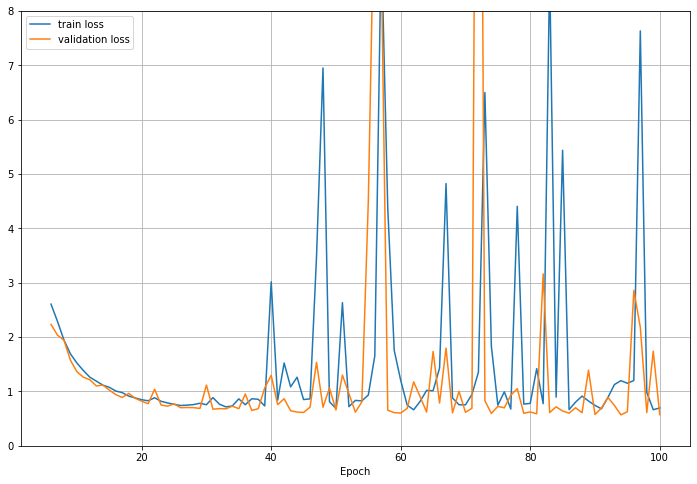

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(xs, y_loss, ms=5, label='train loss')
plt.plot(xs, y_vloss, ms=5, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.ylim([0,8])
plt.show()

- loss 최대값 8.7456 

In [26]:
hist.history.keys()

dict_keys(['loss', 'val_loss'])

## case 2 ) 모델 재정의 , 콜백 함수 사용 

In [27]:
# 항아리식으로 가보자 feat ms.park
model2 = Sequential([
    Dense(10, input_dim=8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(6, activation='relu'),
    Dense(1)
])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                90        
                                                                 
 dense_10 (Dense)            (None, 16)                176       
                                                                 
 dense_11 (Dense)            (None, 6)                 102       
                                                                 
 dense_12 (Dense)            (None, 1)                 7         
                                                                 
Total params: 375
Trainable params: 375
Non-trainable params: 0
_________________________________________________________________


In [29]:
# 옵티마이저 알엠에스 프롬. 
model2.compile(optimizer='rmsprop', loss='mean_squared_error')

In [31]:
# 콜백 정의할것 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
model_path = 'california_house2.h5'
checkpoint = ModelCheckpoint(
    model_path, monitor='val_loss', verbose=1, save_best_only=True
)
early_stop = EarlyStopping(patience=20)

In [33]:
# fit.transform 없는 버전들 체크할 것 . 120번까지 돌고 스탑 됨. 시가가화 후 수정핼 볼것. 
hist2 = model2.fit(X_train, y_train, validation_split=0.2, 
                   epochs=1000, batch_size=128, verbose=0,
                   callbacks=[checkpoint, early_stop])


Epoch 00001: val_loss improved from inf to 3.70977, saving model to california_house2.h5

Epoch 00002: val_loss improved from 3.70977 to 1.57063, saving model to california_house2.h5

Epoch 00003: val_loss did not improve from 1.57063

Epoch 00004: val_loss improved from 1.57063 to 1.47015, saving model to california_house2.h5

Epoch 00005: val_loss improved from 1.47015 to 1.39385, saving model to california_house2.h5

Epoch 00006: val_loss did not improve from 1.39385

Epoch 00007: val_loss did not improve from 1.39385

Epoch 00008: val_loss improved from 1.39385 to 1.31339, saving model to california_house2.h5

Epoch 00009: val_loss improved from 1.31339 to 1.23469, saving model to california_house2.h5

Epoch 00010: val_loss did not improve from 1.23469

Epoch 00011: val_loss did not improve from 1.23469

Epoch 00012: val_loss did not improve from 1.23469

Epoch 00013: val_loss did not improve from 1.23469

Epoch 00014: val_loss improved from 1.23469 to 1.10098, saving model to cal

In [34]:
y_loss = hist2.history['loss']
y_vloss = hist2.history['val_loss']
xs = np.arange(1, len(y_loss)+1)

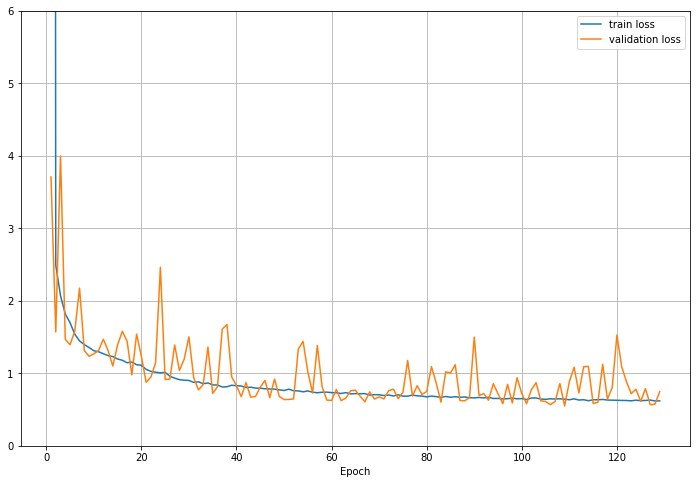

In [39]:
# import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(xs, y_loss, ms=5, label='train loss')
plt.plot(xs, y_vloss, ms=5, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.ylim([0,6]) # 수업버전하고 다르게 내껀 첫 loss 70 나와서 y값 제한 둠.
plt.show()

- 평가  성능 다운된 수업과 반대방향인데 수정 해볼것. 

In [40]:
pred = model.predict(X_test)
pred2 = model2.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, pred), r2_score(y_test, pred)
# (0.5720062522230401, 0.5543111782887399)

(0.5720062522230401, 0.5543111782887399)

In [42]:
mean_squared_error(y_test, pred2), r2_score(y_test, pred2)
# (0.735398467219512, 0.4270012345677485)

(0.735398467219512, 0.4270012345677485)

- 예측치 비교

In [43]:
df = pd.DataFrame({
    'y_test' : y_test, 'pred' : pred.flatten(), 'pred2' : pred2.flatten()
})
df.head(10)

,y_test,pred,pred2
0,4.771,4.478663,3.342354
1,1.371,1.599329,1.008789
2,1.233,1.791254,1.155702
3,0.938,1.470179,1.045247
4,3.260,3.132139,2.785170
5,1.516,1.708559,1.301715
6,2.738,2.489752,1.954634
7,1.368,1.851435,1.396458
8,1.175,0.985979,0.862199
9,2.966,2.846880,2.501725
